**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('DST45.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,3.233875,0.000000,0.0,0.0,1.0,100.0
1,0.999364,3.345697,0.002780,0.0,0.0,1.0,100.0
2,0.999364,3.361255,0.005561,0.0,0.0,1.0,100.0
3,0.999364,3.374544,0.008341,0.0,0.0,1.0,100.0
4,0.999364,3.386698,0.011117,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    3.233875
1       0.999364    3.345697
2       0.999364    3.361255
3       0.999364    3.374544
4       0.999364    3.386698
...          ...         ...
7195   -2.499930    3.428834
7196   -2.499930    3.428834
7197   -2.499930    3.428510
7198   -2.499930    3.428348
7199   -2.499750    3.428186

[7200 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[ 0.          0.00044915]
 [ 0.0001388   0.00060348]
 [ 0.0001388   0.00060564]
 ...
 [-0.00034721  0.00012897]
 [-0.00034721  0.00012895]
 [-0.00034719  0.00012895]]


             0         1
0     0.000000  0.000449
1     0.000139  0.000603
2     0.000139  0.000606
3     0.000139  0.000607
4     0.000139  0.000609
...        ...       ...
7195 -0.000347  0.000129
7196 -0.000347  0.000129
7197 -0.000347  0.000129
7198 -0.000347  0.000129
7199 -0.000347  0.000129

[7200 rows x 2 columns]


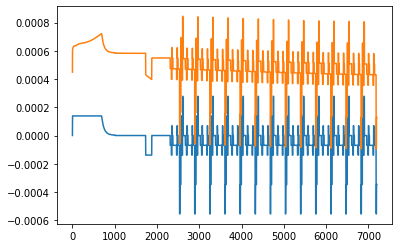

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.333258  0.157734
1     0.666377  0.485934
2     0.666377  0.490530
3     0.666377  0.494455
4     0.666377  0.498045
...        ...       ...
7195 -0.500045 -0.523064
7196 -0.500045 -0.523064
7197 -0.500045 -0.523159
7198 -0.500045 -0.523207
7199 -0.499985 -0.523202

[7200 rows x 2 columns]


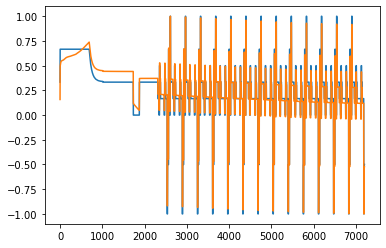

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
7195  2.245806e-03
7196  1.690899e-03
7197  1.127294e-03
7198  5.636610e-04
7199  1.140000e-07

[7200 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
864   1.000000
7048  0.025638
1744  0.971101
1870  0.691046
5949  0.177441
...        ...
2634  0.630662
3524  0.516939
2303  0.680381
5708  0.214733
7182  0.011939

[5040 rows x 1 columns]
           SOC
6819  0.062416
4234  0.418052
6390  0.118770
1567  1.000000
2949  0.584069
...        ...
6632  0.080753
1504  1.000000
5394  0.260510
960   1.000000
310   1.000000

[2160 rows x 1 columns]
             0         1
864   0.357209  0.464431
7048  0.166602  0.119819
1744 -0.000030  0.111651
1870 -0.000030  0.049616
5949  0.333233  0.292886
...        ...       ...
2634  0.333173  0.361952
3524  0.166602  0.181949
2303  0.333114  0.371281
5708  0.333173  0.297620
7182  0.166542  0.118569

[5040 rows x 2 columns]
             0         1
6819  0.166602  0.121925
4234  0.166542  0.166627
6390  0.166602  0.126041
1567  0.333258  0.441342
2949 -0.000030  0.030565
...        ...       ...
6632  0.166602  0.123600
1504  0.333258  0.441485
539

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    82.18
dtype: float64%


**SOC Graph**

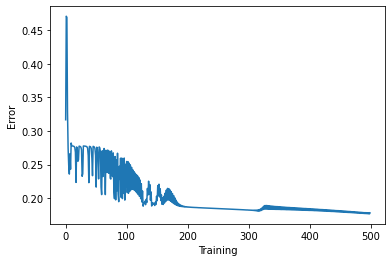

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.057935
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.0579347511748202

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.178174
dtype: float64


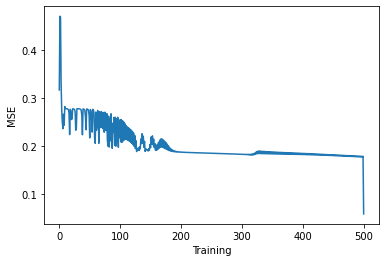

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

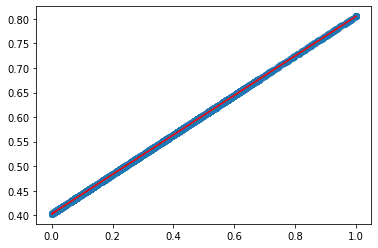

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    82.79
dtype: float64%


**SOC error Graph**

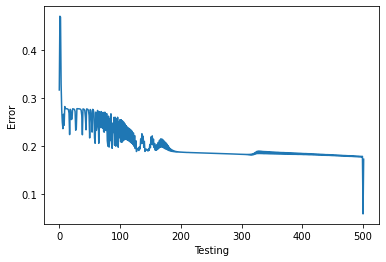

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.054232
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.054232405836065575

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.172089
dtype: float64


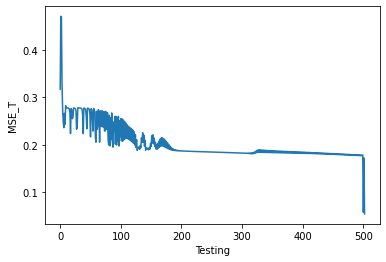

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()